In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/KT/license_detection/images

/content/drive/MyDrive/KT/license_detection/images


In [5]:
!ls

train_image.zip


In [6]:
!unzip train_image.zip

Archive:  train_image.zip
  inflating: Cars0.png               
  inflating: Cars0_pepper.png        
  inflating: Cars1.png               
  inflating: Cars10.png              
  inflating: Cars100.png             
  inflating: Cars100_pepper.png      
  inflating: Cars101.png             
  inflating: Cars101_pepper.png      
  inflating: Cars102.png             
  inflating: Cars102_pepper.png      
  inflating: Cars103.png             
  inflating: Cars103_pepper.png      
  inflating: Cars104.png             
  inflating: Cars104_pepper.png      
  inflating: Cars105.png             
  inflating: Cars105_pepper.png      
  inflating: Cars106.png             
  inflating: Cars106_pepper.png      
  inflating: Cars107.png             
  inflating: Cars107_pepper.png      
  inflating: Cars108.png             
  inflating: Cars108_pepper.png      
  inflating: Cars109.png             
  inflating: Cars109_pepper.png      
  inflating: Cars10_pepper.png       
  inflating: Cars11.png 

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import xml.etree.ElementTree as ET
import pandas as pd

In [ ]:
img_names = []
annotations = []

for dirname, _, filenames in os.walk('./'):
  for filename in filenames:
    if os.path.join(dirname, filename)[-3:]==('png' or 'jpg'):
      img_names.append(filename)
    elif os.path.join(dirname, filename)[-3:]=='xml':
      annotations.append(filename)

In [ ]:
img_names[:5]

['Cars101.png', 'Cars105.png', 'Cars104.png', 'Cars1.png', 'Cars11.png']

In [ ]:
len(annotations)

433

In [ ]:
dataset = {
            "file":[],
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],
            "xmax":[],
            "ymax":[],
            "class":[],
            "Xcent":[],
            "Ycent":[],
           "boxW":[],
           "boxH":[],
           "name":[],
           }

In [ ]:
ANNO_PATH = './annotations/*.xml'

for item in glob.glob(ANNO_PATH):
  tree = ET.parse(item)

  for elem in tree.iter():
    if 'filename' in elem.tag:
        filename=elem.text[:-4]
    elif 'width' in elem.tag:
        width=int(elem.text)
    elif 'height' in elem.tag:
        height=int(elem.text)
    elif 'xmin' in elem.tag:
        xmin=int(elem.text)
    elif 'ymin' in elem.tag:
        ymin=int(elem.text)
    elif 'xmax' in elem.tag:
        xmax=int(elem.text)
    elif 'ymax' in elem.tag:
        ymax=int(elem.text)

        dataset['file'].append(filename)
        dataset['width'].append(width)
        dataset['height'].append(height)
        dataset['xmin'].append(xmin)
        dataset['ymin'].append(ymin)
        dataset['xmax'].append(xmax)
        dataset['ymax'].append(ymax)
        dataset['class'].append(1)
        dataset['Xcent'].append((xmin+xmax)/2/width)
        dataset['Ycent'].append((ymin+ymax)/2/height)
        dataset['boxW'].append((xmax-xmin)/width)
        dataset['boxH'].append((ymax-ymin)/height)
        dataset['name'] = 'license'
classes = ['license']

In [ ]:
df = pd.DataFrame(dataset)

In [12]:
df=pd.read_csv('/content/drive/MyDrive/KT/license_detection/df_pepper_dataframe.csv', index_col=0)

In [13]:
df['file']=df['file']

,file,width,height,xmin,ymin,xmax,ymax,class,Xcent,Ycent,boxW,boxH,name
0,Cars0.png,500,268,226,125,419,173,1,0.64500,0.555970,0.3860,0.179104,license
1,Cars1.png,400,248,134,128,262,160,1,0.49500,0.580645,0.3200,0.129032,license
2,Cars10.png,400,225,140,5,303,148,1,0.55375,0.340000,0.4075,0.635556,license
3,Cars100.png,400,267,175,114,214,131,1,0.48625,0.458801,0.0975,0.063670,license
4,Cars101.png,400,300,167,202,240,220,1,0.50875,0.703333,0.1825,0.060000,license


AttributeError: ignored

In [23]:
imgs = os.listdir('/content/drive/MyDrive/KT/license_detection/images')
train_imgs, valid_imgs = train_test_split(imgs, test_size=0.05, random_state=2022)

#df = pd.read_csv('/content/drive/MyDrive/KT/license_detection/annotation_dataframe.csv')

In [24]:
import yaml
cwd = '/content/drive/MyDrive/KT/license_detection/'
data = dict(
    train = cwd + 'train.txt',
    val = cwd + 'val.txt',
    nc = 1,
    names = ['license'],
)

with open(cwd + 'bgr.yaml', 'w') as outfile:
  yaml.dump(data, outfile, default_flow_style=False)
with open(cwd + 'train.txt', 'w') as f:
  for path in train_imgs:
    f.write(cwd+'images/'+path+'\n')
with open(cwd + 'val.txt', 'w') as f:
  for path in valid_imgs:
    f.write(cwd+'images/'+path+'\n')

In [29]:
for file in imgs:
  #file = file.split('.')[0]
  bboxs = []
  for _, row in df[df['file'] == file].iterrows():
    bbox = [str(0), str(row['Xcent']), str(row['Ycent']), str(row['boxW']), str(row['boxH'])]
    bbox = ' '.join(bbox)
    bboxs.append(bbox)
  file = file.split('.')[0]
  with open(cwd+'labels/'+file+'.txt', 'w') as f:
    bboxs = '\n'.join(bboxs)
    f.write(bboxs)

In [34]:
%pwd

'/content/drive/MyDrive/KT/license_detection/images/yolov5'

In [30]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14411, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14411 (delta 12), reused 22 (delta 10), pack-reused 14379
Receiving objects: 100% (14411/14411), 13.37 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (9967/9967), done.
/content/drive/MyDrive/KT/license_detection/images/yolov5
     |████████████████████████████████| 1.6 MB 41.7 MB/s 


In [ ]:
# %cd yolov5

/content/drive/MyDrive/KT/license_detection/yolov5


In [32]:
!python train.py --img 640\
 --batch 16\
  --epochs 30\
   --data /content/drive/MyDrive/KT/license_detection/bgr.yaml\
    --weights yolov5s.pt --name car_license_detection

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/KT/license_detection/bgr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=car_license_detection, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

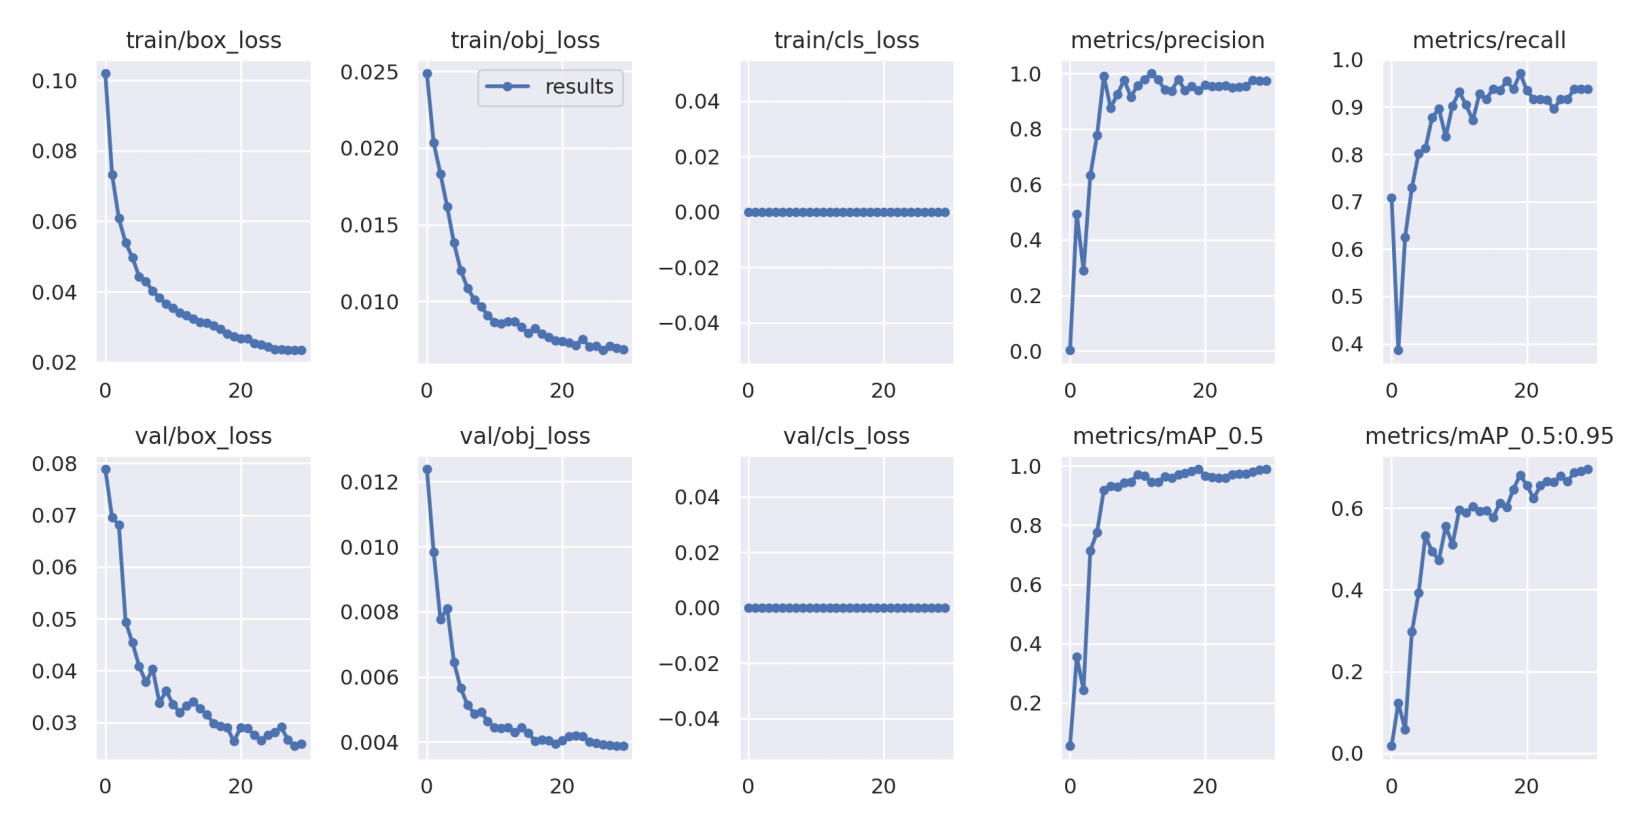

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/KT/license_detection/images/yolov5/runs/train/car_license_detection2/results.png'))

In [36]:
import torch
from PIL import Image

CKPT_PATH = '/content/drive/MyDrive/KT/license_detection/images/yolov5/runs/train/car_license_detection2/weights/best.pt'
yolov5 = torch.hub.load('/content/drive/MyDrive/KT/license_detection/images/yolov5',
                        'custom',
                        path=CKPT_PATH,
                        source='local',
                        force_reload=True)

'confidence: ' + str(yolov5.conf)

INFO:yolov5:YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


'confidence: 0.25'

In [41]:
%pwd

'/content/drive/MyDrive/KT/license_detection/images/yolov5'

In [42]:
imgs = os.listdir('/content/drive/MyDrive/KT/license_detection/images')

pred_df = pd.DataFrame()
for pths in imgs:
    if pths == 'yolov5':
      continue
    img = Image.open('/content/drive/MyDrive/KT/license_detection/images/' + pths).convert('RGB')
    img = np.asarray(img)
    pred = yolov5(img, size=1280, augment=False)
    for i, row in pred.pandas().xyxy[0].iterrows():
        if row['confidence'] < yolov5.conf: break
        row['path'] = pths
        pred_df = pred_df.append(row)
pred_df = pred_df.reset_index()

In [43]:
pred_df

,index,xmin,ymin,xmax,ymax,confidence,class,name,path
0,0,234.465958,127.466667,421.830414,171.936554,0.702158,0.0,license,Cars0.png
1,0,230.844543,128.883484,418.836884,170.406647,0.755735,0.0,license,Cars0_pepper.png
2,0,136.461639,126.123360,260.186890,155.433563,0.902740,0.0,license,Cars1.png
3,0,140.118927,25.659084,314.237732,144.419479,0.445800,0.0,license,Cars10.png
4,0,175.482925,117.430115,212.500549,129.995102,0.850985,0.0,license,Cars100.png
...,...,...,...,...,...,...,...,...,...
1168,0,133.000122,71.361160,198.887756,114.497414,0.647498,0.0,license,Cars98_pepper.png
1169,1,78.656731,199.095474,248.127518,259.011139,0.566948,0.0,license,Cars98_pepper.png
1170,0,78.273338,205.828857,266.948944,259.762238,0.841270,0.0,license,Cars99.png
1171,0,76.041489,202.965256,265.856049,260.321564,0.765930,0.0,license,Cars99_pepper.png


In [44]:
%cd /content/drive/MyDrive/KT/license_detection/

/content/drive/MyDrive/KT/license_detection


In [45]:
!sudo apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,704 kB/s)
debconf: unable to initi

In [49]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 35.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [50]:
import pytesseract

for i, row in pred_df.iterrows():
    if pths == 'yolov5':
      continue
    img = '/content/drive/MyDrive/KT/license_detection/images/' + row['path']
    img = Image.open(img).convert('RGB')
    img = np.asarray(img)
    img_cropped = img[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax'])]
    text = pytesseract.image_to_string(img_cropped)
    pred_df.loc[i, 'text_detected'] = text

In [51]:
pred_df.to_csv('/content/drive/MyDrive/KT/license_detection/pred_df.csv')

In [52]:
pred_df[pred_df['path'] == 'Cars101.png']

,index,xmin,ymin,xmax,ymax,confidence,class,name,path
6,0,164.598709,201.670685,239.377655,219.037964,0.87366,0.0,license,Cars101.png


,index,xmin,ymin,xmax,ymax,confidence,class,name,path
0,0,234.465958,127.466667,421.830414,171.936554,0.702158,0.0,license,Cars0.png
1,0,230.844543,128.883484,418.836884,170.406647,0.755735,0.0,license,Cars0_pepper.png
2,0,136.461639,126.123360,260.186890,155.433563,0.902740,0.0,license,Cars1.png
3,0,140.118927,25.659084,314.237732,144.419479,0.445800,0.0,license,Cars10.png
4,0,175.482925,117.430115,212.500549,129.995102,0.850985,0.0,license,Cars100.png
...,...,...,...,...,...,...,...,...,...
1168,0,133.000122,71.361160,198.887756,114.497414,0.647498,0.0,license,Cars98_pepper.png
1169,1,78.656731,199.095474,248.127518,259.011139,0.566948,0.0,license,Cars98_pepper.png
1170,0,78.273338,205.828857,266.948944,259.762238,0.841270,0.0,license,Cars99.png
1171,0,76.041489,202.965256,265.856049,260.321564,0.765930,0.0,license,Cars99_pepper.png
